# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where __ _wi, wh, b, a, c_ __ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input (x0, x1) = (1, 0), ground truth (g1, g2) = (1, 1), h0 = 0, (wi, wh, b, a, c) = (1, 1, 1, 1, 1), compute __ _(dwi, dwh, db, da, dc)_ __, which are the gradients of loss with repect to 5 parameters __ _(wi, wh, b, a, c)_ __.

![bptt](img/bptt.png)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.


**Forward Pass:**
$$
\begin{align}
h_1 & = \sigma( wi \times x + wh\times h + b) = \sigma(1\times1 + 1\times0 + 1) = \sigma(2) = 0.881 \\
y_1 & = a\times h + c = 1\times0.881 + 1 = 1.881 \\
h_2 & = \sigma( 1\times0 + 1\times0.881 + 1) = 0.868 \\
y_2 & = 1\times0.868 + 1 = 1.868
\end{align}
$$
**Backprop (t = 1):**
$$
\begin{align}
Loss & = L_1  = (y_1 - \hat{y}_1)^{2} \\
\partial y_1 & = 2\, (y_1 - \hat{y}_1) = 2 \times 0.881 = 1.762 \\
\partial a_1 & = \partial y_1\, \frac{\partial y_1}{\partial a} = \partial y_1\, h_1 = 1.762 \times 0.881 = 1.552 \\ 
\partial c_1 & = \partial y_1\, \frac{\partial y_1}{\partial c} = \partial y_1\ = 1.762 \\
\partial h_1 & = \partial y_1\, \frac{\partial y_1}{\partial h_1} = \partial y_1\, a = 1.762 \\
\partial wi_1 & =  \partial h_1\, \frac{\partial h_1}{\partial wi_1} \\
& = 1.762 \times h_1\, (1 - h_1)\, x_0 \\
& = 1.762 \times 0.881 \times 0.119 \times 1 \\
& = 0.185 \\
\partial wh_1 & = \partial h_1\, \frac{\partial h_1}{\partial wh_1} \\
& = 1.762 \times h_1\, (1 - h_1)\, h_0 \\
& = 1.762 \times 0.881 \times 0.119 \times 0 \\
& = 0 \\
\partial b_1 & = \partial h_1\, \frac{\partial h_1}{\partial b_1} \\
& = 1.762 \times h_1\, (1 - h_1) \\
& = 1.762 \times 0.881 \times 0.119\\
& = 0.185 \\
\end{align}
$$
**Backprop (t = 2):**
$$
\begin{align}
L_2 & = (y_2 - \hat{y}_2)^{2} \\
\partial y_2 & = 2\, (y2 - \hat{y}2) = 2 \times 0.868 = 1.736 \\
\partial a_2 & = \partial y_2\, \frac{\partial y_2}{\partial a} = \partial y_2\, h_2 = 1.736 \times 0.868 = 1.507 \\ 
\partial c_2 & = \partial y_2\, \frac{\partial y_2}{\partial c} = \partial y_2\ = 1.736 \\
\partial h_2 & = \partial y_2\, \frac{\partial y_2}{\partial h_2} = \partial y_2\, a = 1.736 \\
\partial wi_2 & =  \partial h_2\, \frac{\partial h_2}{\partial wi_2} \\
& = \partial h_2\, h_2\, (1 - h_2)\, (x_1 + wh\, \frac{\partial h_1}{\partial wi}) \\
& = \partial h_2\, h_2\, (1 - h_2)\, (x_1 + h_1\, (1 - h_1)\, x_0) \\
& = 1.736 \times 0.868 \times 0.132 \times (0 + 0.881 \times 0.119 \times 1) \\
& = 0.021 \\
\partial wh_2 & =  \partial h_2\, \frac{\partial h_2}{\partial wh_2} \\
& = \partial h_2\, h_2\, (1 - h_2)\, (h_1 + wh\, \frac{\partial h_1}{\partial wh}) \\
& = \partial h_2\, h_2\, (1 - h_2)\, (h_1 + h_1\, (1 - h_1)\, h_0) \\
& = 1.736 \times 0.868 \times 0.132 \times (0.881 + 0.881 \times 0.119 \times 0) \\
& = 0.175 \\
\partial b_2 & =  \partial h_2\, \frac{\partial h_2}{\partial b_2} \\
& = \partial h_2\, h_2\, (1 - h_2)\, (1 + \frac{\partial h_1}{\partial b}) \\
& = \partial h_2\, h_2\, (1 - h_2)\, (h1 + h_1\, (1 - h_1)) \\
& = 1.736 \times 0.868 \times 0.132 \times (1 + 0.881 \times 0.119) \\
& = 0.219 \\
\end{align}
$$
$
\partial \textbf{wi}, \partial \textbf {wh}, \partial \textbf {b}, \partial \textbf {a}, \partial \textbf {c}:
$
$$
\begin{align}
\partial wi & = \partial wi_1 + \partial wi_2 = 0.206 \\
\partial wh & = \partial wh_1 + \partial wh_2 = 0.175 \\
\partial a & = \partial a_1 + \partial a_2 = 3.059 \\
\partial b & = \partial b_1 + \partial b_2 = 0.404 \\
\partial c & = \partial c_1 + \partial c_2 = 3.498 \\
\end{align}
$$

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the LSTM. Please read the source code for more information.

In [2]:
from ecbm4040.xor.utils import create_dataset

In [48]:
#Create Data

#Create dataset
num_samples=1000
fraction_validation=0.2
X_train, y_train = create_dataset(num_samples)

# Data organizations:

num_validation = int(fraction_validation*num_samples)

X_val = X_train[-num_validation:, :, :]
y_val = y_train[-num_validation:, :]

X_train = X_train[:-num_validation, :, :]
y_train = y_train[:-num_validation, :]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Train data shape:  (800, 8, 1)
Train labels shape:  (800, 8)
Validation data shape:  (200, 8, 1)
Validation labels shape:  (200, 8)


### Build a network using a Tensorlow LSTMCell
This section shows an example how to build a RNN network using an LSTM cell. LSTM cell is an inbuilt class in tensorflow which implements the real behavior of the LSTM neuron. 

Reference: [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)

In [50]:
from tensorflow.contrib.rnn import LSTMCell

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [51]:
epoch=15
batch_size=100

iters = int(X_train.shape[0] / batch_size)
print('number of batches for training: {}'.format(iters))

iter_total = 0
best_acc = 0
losses=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epc in range(epoch):
        print("epoch {} ".format(epc + 1))

        for itr in range(iters):

            training_batch_x = X_train[itr * batch_size: (1 + itr) * batch_size]
            training_batch_y = y_train[itr * batch_size: (1 + itr) * batch_size]

            _, cur_loss = sess.run([optimizer, loss], feed_dict={input_data: training_batch_x, output_data: training_batch_y})
            print('{}/{} loss: {}'.format(
                    batch_size * (itr + 1),
                    X_train.shape[0],
                    cur_loss))
            losses.append(cur_loss)
print("Traning ends.")

number of batches for training: 8
epoch 1 
100/800 loss: 0.7052947282791138
200/800 loss: 0.7495351433753967
300/800 loss: 0.7054566144943237
400/800 loss: 0.700731635093689
500/800 loss: 0.6955520510673523
600/800 loss: 0.6873228549957275
700/800 loss: 0.6884006261825562
800/800 loss: 0.688022792339325
epoch 2 
100/800 loss: 0.6827296614646912
200/800 loss: 0.681915283203125
300/800 loss: 0.6842654347419739
400/800 loss: 0.6752803325653076
500/800 loss: 0.6620873212814331
600/800 loss: 0.6191584467887878
700/800 loss: 0.6121265888214111
800/800 loss: 0.5469506978988647
epoch 3 
100/800 loss: 0.5443734526634216
200/800 loss: 0.6011295318603516
300/800 loss: 0.5922192335128784
400/800 loss: 0.5067797303199768
500/800 loss: 0.372730016708374
600/800 loss: 0.40567222237586975
700/800 loss: 0.2807943522930145
800/800 loss: 0.2102794051170349
epoch 4 
100/800 loss: 0.22637870907783508
200/800 loss: 0.14936980605125427
300/800 loss: 0.11247143894433975
400/800 loss: 0.1034536063671112
500/80

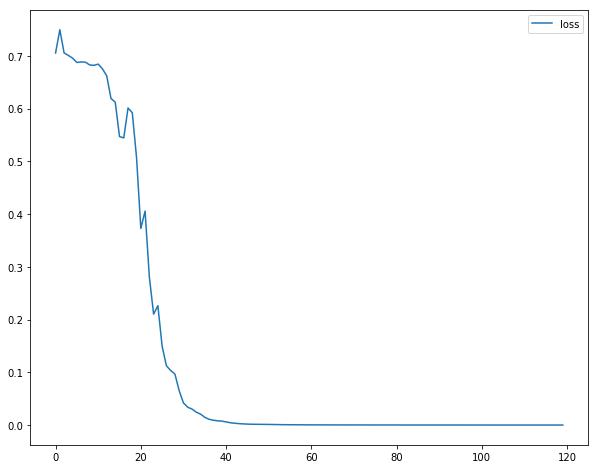

In [52]:
#Plotting loss vs epochs
plt.figure(figsize=(10,8))
plt.plot(losses, label="loss")
plt.legend()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [58]:
from ecbm4040.xor.rnn import MyLSTMCell

# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [55]:
# YOUR TRAINING AND PLOTTING CODE HERE
epoch=15
batch_size=100

iters = int(X_train.shape[0] / batch_size)
print('number of batches for training: {}'.format(iters))

iter_total = 0
best_acc = 0
losses=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epc in range(epoch):
        print("epoch {} ".format(epc + 1))

        for itr in range(iters):

            training_batch_x = X_train[itr * batch_size: (1 + itr) * batch_size]
            training_batch_y = y_train[itr * batch_size: (1 + itr) * batch_size]

            _, cur_loss = sess.run([optimizer, loss], feed_dict={input_data: training_batch_x, output_data: training_batch_y})
            print('{}/{} loss: {}'.format(
                    batch_size * (itr + 1),
                    X_train.shape[0],
                    cur_loss))
            losses.append(cur_loss)
print("Traning ends.")

number of batches for training: 8
epoch 1 
100/800 loss: 0.6955928206443787
200/800 loss: 0.740265965461731
300/800 loss: 0.6894403696060181
400/800 loss: 0.6942646503448486
500/800 loss: 0.6934614777565002
600/800 loss: 0.7031840682029724
700/800 loss: 0.6870318651199341
800/800 loss: 0.6844196915626526
epoch 2 
100/800 loss: 0.681629478931427
200/800 loss: 0.6877620220184326
300/800 loss: 0.6816754341125488
400/800 loss: 0.6786144971847534
500/800 loss: 0.6586611866950989
600/800 loss: 0.6616349220275879
700/800 loss: 0.6105339527130127
800/800 loss: 0.6326364874839783
epoch 3 
100/800 loss: 0.45354363322257996
200/800 loss: 0.38253065943717957
300/800 loss: 0.27468758821487427
400/800 loss: 0.20591045916080475
500/800 loss: 0.1950611174106598
600/800 loss: 0.1953883022069931
700/800 loss: 0.13788960874080658
800/800 loss: 0.1392546445131302
epoch 4 
100/800 loss: 0.1550242006778717
200/800 loss: 0.11097326129674911
300/800 loss: 0.10336418449878693
400/800 loss: 0.11206682026386261


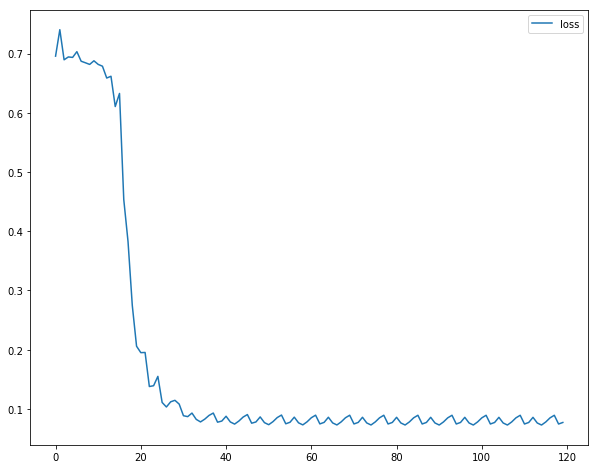

In [56]:
#Plotting loss vs epochs
plt.figure(figsize=(10,8))
plt.plot(losses, label="loss")
plt.legend()

In [2]:
import tensorflow as tf
print (tf.__file__)

C:\Users\zoran\Anaconda3\envs\dlWorksA3\lib\site-packages\tensorflow\__init__.py


In [36]:
print(tf.__file__)

/Users/ADI/anaconda/envs/dlWorks/lib/python3.5/site-packages/tensorflow/__init__.py
